a) The average function $\bar{g}(x)$ denotes $\mathbf{E}_{D}[g^{(D)}(x)]$.

Since H consists of the functions in the form h(x) = ax + b, we choose the line that passes through the two data points 
$(x_{1}, x_{1}^2)$ and $(x_{2}, x_{1}^2)$.

The Equation of a line that passes through a point is $ y - y_{1} = m(x - x_{1})$
where m is the slope of the line. We can find the slope from two the points:

m = $(\frac{x_{2}^2-x_{1}^2}{x_{2}-x_{1}})$
$ = x_{1} + x_{2} $

$ \hat{y} - x_{1}^2  = (x_{1} + x_{2})(x - x_{1})$

$ \hat{y} = (x_{1} + x_{2})(x - x_{1}) + x_{1}^2 $

$         = x_{1}x - x_{1}^2 + x_{2}x - x_{2}x_{1} + x_{1}^2 $

$         = x_{1}x + x_{2}x - x_{2}x_{1} $

$         = (x_{1}+ x_{2})x - x_{2}x_{1} $

So based on that line, we can find $\bar{g}(x)$:

$ \bar{g}(x) = \mathbf{E}_{D}[ (x_{1}+ x_{2})x - x_{2}x_{1}] $

$= \mathbf{E}_{x_{1}, x_{2}}[(x_{1}+ x_{2})x - x_{2}x_{1} ] $

$= {\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [(x_{1}+ x_{2})x - x_{2}x_{1} ]*p(x_{1})*p(x_{2}) \,dx_{1}dx_{2}} $

$= \frac{1}{2}*\frac{1}{2}{\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [ (x_{1}+ x_{2})x - x_{2}x_{1}] \,dx_{2}dx_{1}} $

$=0$





In [1]:
import matplotlib.pyplot as plt
import numpy as np


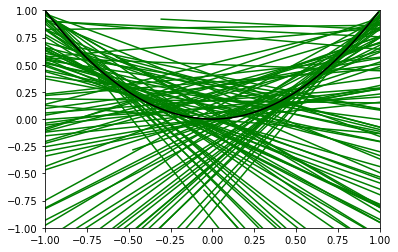

In [2]:
def abline(slope, intercept):
    """Plot a line from slope and intercept
    from https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib"""
    
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-g')

def generate_data(num_datasets, seed_num):
    rng = np.random.default_rng(seed = seed_num)
    size = (num_datasets, 2)
    return rng.uniform(size=size) * rng.choice([-1,1], size)

plt_start = -1
plt_stop = 1
seed = np.random.randint(20)
num_datasets = 100
x = generate_data(num_datasets, seed)
y = np.square(x)
data = np.stack((x,y), axis=-1) #data is an array of data sets (size size.shape[0]) that look like [[x1,x1^2], [x2, x2^2]]

slopes = (y.T[1] - y.T[0]) / (x.T[1] - x.T[0])
intercepts = slopes * (-x.T[0]) + y.T[0]

plt.subplot()

#plt.plot(x.flatten(), y.flatten(), 'bo') #data points

plot_lines = np.vectorize(abline)
plot_lines(slopes, intercepts)

plt.plot(np.arange(plt_start,plt_stop, 0.01), np.square(np.arange(plt_start,plt_stop, 0.01)), 'k') # f(x)

plt.xlim([plt_start, plt_stop]) #set x limits to [-1,-1]
plt.ylim([plt_start,plt_stop])
plt.show()



mean slope: -0.03163542049149224
Mean interecept: -0.008784329750880993


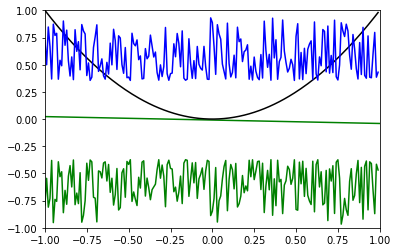

In [3]:
def stddev(point, slope, intercept):
    return np.std((slope*point) + intercept)

def samp_mean(point, slope, intercept):
    return np.mean((slope*point) + intercept)

plt.subplot()
plt.xlim([plt_start,plt_stop]) #set x limits to [-1,-1]
plt.ylim([plt_start,plt_stop])


print("mean slope:", slopes.mean())
print("Mean interecept:", intercepts.mean())

test_data = generate_data(num_datasets, 42).flatten()


std = np.zeros(num_datasets*2)
mn = np.zeros(num_datasets*2)
for i, point in enumerate(test_data):   
    std[i] = stddev(point, slopes, intercepts)
    mn[i] = samp_mean(point, slopes, intercepts)


up = mn + std
down = mn - std
abline(slopes.mean(), intercepts.mean()) #gbar(x)

plt.plot(np.arange(-1,1, 0.01), np.square(np.arange(-1,1, 0.01)), 'k') #f(x)
plt.plot(np.arange(-1,1, 0.01), up, '-b')
plt.plot(np.arange(-1,1, 0.01), down, '-g')
mid = np.linspace(plt_start, plt_stop, 1)
plt.fill_between(mid, up, down, alpha=0.2)

